In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img =cv2.imread("C:/Users/shapunya vemula/Pictures/Saved Pictures/thumb-1920-380354.jpg")
img = cv2.resize(img,(800,800))
img.shape

(800, 800, 3)

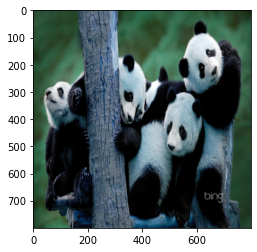

In [3]:
plt.imshow(img)

In [4]:
height,width,_ = img.shape

In [5]:
cv2.imshow("image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
#load the config files and weight files
net =cv2.dnn.readNet("C:/Users/shapunya vemula/Desktop/yolov3.cfg","C:/Users/shapunya vemula/Desktop/yolov3.weights")

In [7]:
classes =[]
with open("C:/Users/shapunya vemula/Desktop/coco.names",'r') as file:
    classes = file.read().splitlines()

In [8]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [9]:
#image preprosses
blob = cv2.dnn.blobFromImage(img,1/255,(416,416),(0,0,0),swapRB = True, crop = False)

In [10]:
for each in blob:
    for n, image in enumerate(each):
        cv2.imshow(str(n),image)
        cv2.waitKey(1000)
        cv2.destroyAllWindows()


In [11]:
net.setInput(blob)
OutputLayerNames=net.getUnconnectedOutLayersNames()
layeroutputs = net.forward(OutputLayerNames)

In [12]:
layeroutputs

[array([[0.03171901, 0.04456961, 0.34231707, ..., 0.        , 0.        ,
         0.        ],
        [0.04593734, 0.02815025, 0.24844281, ..., 0.        , 0.        ,
         0.        ],
        [0.04022669, 0.02971567, 0.8151783 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.95504737, 0.94925237, 0.42239672, ..., 0.        , 0.        ,
         0.        ],
        [0.95999557, 0.9642638 , 0.3516006 , ..., 0.        , 0.        ,
         0.        ],
        [0.9678964 , 0.9659002 , 0.8596181 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.0205993 , 0.020503  , 0.05724608, ..., 0.        , 0.        ,
         0.        ],
        [0.01205241, 0.01952399, 0.36793104, ..., 0.        , 0.        ,
         0.        ],
        [0.01822558, 0.01900694, 0.07500432, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.97706294, 0.97749525, 0.04656132, ..., 0.        , 0.        ,
         0.        

In [13]:
#storing the final output of bounding box and classes and confidence of the object detected by yolo in the image
boxes = []
confidences = []
class_ids = []

for each in layeroutputs:
    for detection in each:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            
            x = int(center_x - (w/2))
            y = int(center_y - (h/2))
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
print(boxes) #printing the bounding boxes values for each object
print(confidences) # also it's respected confidences
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0.4)
print(indexes.flatten())
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size = (len(boxes),3)) 

for i in indexes.flatten():
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(image,(x,y),(x+w,y+h),color,2)
    cv2.putText(image,label+" " + confidence, (x,y+20),font,2,(255,255,255),)
    


[[530, 47, 229, 735], [24, 268, 184, 476], [330, 250, 246, 535], [449, 273, 178, 518]]
[0.5556069612503052, 0.5265746116638184, 0.5371347069740295, 0.6277435421943665]
[3 0 1]


In [14]:
cv2.imshow("image",image)
cv2.waitKey(0)
cv2.destroyAllWindows()